In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

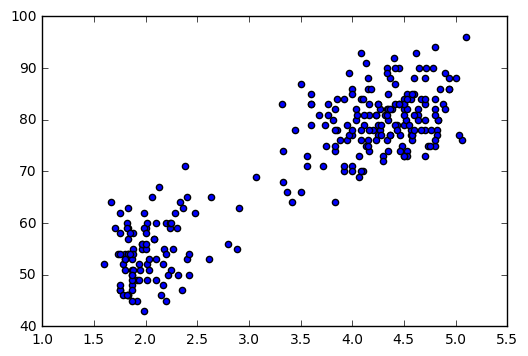

In [55]:
f = np.loadtxt("faithful.dat.txt")
data = np.delete(f, 0, 1)
plt.scatter(data[:,0], data[:,1])

## Expectaction Maximization(EM) Algorithms

In [372]:
class ExpectationMaximization:
    
    def __init__(self, data, k=2):
        # make initial guess about the parameters
        self.max_iteration = 100
        self.data = data
        self.k = k
        self.mean_history = []
        m, n = self.data.shape
        self.mu = np.mat(np.zeros((k,n)))
        self.pi = [1.0/k]*k
        for i in range(n):
            minE = min(data[:,i])
            maxE = max(data[:,i])
            self.mu[:,i] = minE + (maxE - minE) * np.random.rand(k,1)
        self.mu = np.array(self.mu)
        initial_cov = np.dot(data.T, data)
        self.cov = np.array([initial_cov] * k)
        
            
    def iterate(self):
        m, n = self.data.shape
        yi = np.zeros((m,self.k))
        cnt = 0
        for _ in range(self.max_iteration):
            self.mean_history.append(np.copy(self.mu))
            cnt += 1
            prev_yi = np.copy(yi)
            # E-step
            for i in range(m):
                denominator = 0
                for j in range(self.k):
                    denominator += self.pi[j] * multivariate_normal.pdf(data[i,:], mean=self.mu[j,:], cov=self.cov[j])
                for j in range(self.k):
                    yi[i,j] = (self.pi[j] * multivariate_normal.pdf(data[i,:], mean=self.mu[j,:], cov=self.cov[j])) / denominator
            # M-step
            if np.allclose(yi, prev_yi): break
            for j in range(self.k):
                numerator = 0
                denominator = 0
                for i in range(m):
                    numerator += yi[i,j] * data[i,:]
                    denominator += yi[i,j]
                self.mu[j] = numerator / denominator
                numerator = 0
                denominator = 0
                for i in range(m):
                    numerator += yi[i,j] * (data[i,:]-self.mu[j])**2
                    denominator += yi[i,j]
                self.cov[j] = numerator / denominator
                self.pi[j] = (np.sum(yi[:,j])) / m
        return cnt
    
    
    def print_history(self):
        plt.figure()
        plt.scatter(data[:,0], data[:,1], s=[50]*len(data), linewidth=0, c='gray')
        a = np.array([m[0,:] for m in self.mean_history])
        b = np.array([m[1,:] for m in self.mean_history])
        prev_x, prev_y = None, None
        for k in a:
            cur_x, cur_y = k[0],k[1]
            if prev_x and prev_y:
                plt.quiver(prev_x,prev_y,cur_x-prev_x,cur_y-prev_y,scale_units='xy', angles='xy', scale=1, color='g')
            prev_x = cur_x
            prev_y = cur_y
        prev_x, prev_y = None, None
        for k in b:
            cur_x, cur_y = k[0],k[1]
            if prev_x and prev_y:
                plt.quiver(prev_x,prev_y,cur_x-prev_x,cur_y-prev_y,scale_units='xy', angles='xy', scale=1, color='r')
            prev_x = cur_x
            prev_y = cur_y
            
        
        
        

take 21 iterations to  converge
Plot the trajectories of two mean vectors in 2 dimensions


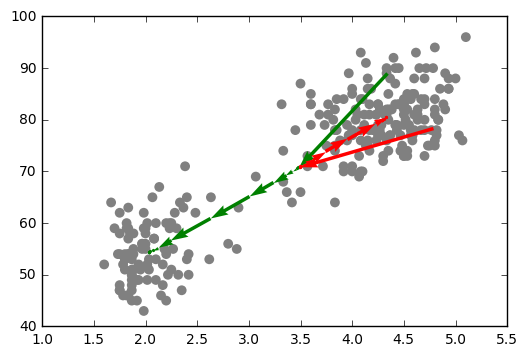

In [373]:
em = ExpectationMaximization(data)
num = em.iterate()
print "take " + str(num) + " iterations to  converge"
print "Plot the trajectories of two mean vectors in 2 dimensions"
em.print_history()

In [ ]:
iterations = []
for i in range(50):
    em = ExpectationMaximization(data)
    num = em.iterate()
    print i, num
    iterations.append(num)

(array([  1.,  17.,  13.,   6.,   0.,   8.,   2.,   2.,   0.,   1.]),
 array([ 18. ,  18.8,  19.6,  20.4,  21.2,  22. ,  22.8,  23.6,  24.4,
         25.2,  26. ]),
 <a list of 10 Patch objects>)

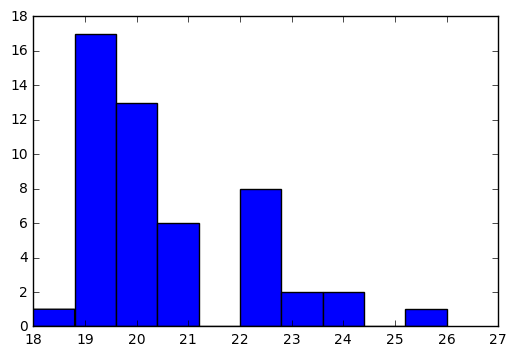

In [312]:
plt.hist(iterations)